# Turtle Rescue Forecast Challenge


* Link:
[Turtle Rescue Forecast Challenge](https://zindi.africa/competitions/turtle-rescue-forecast-challenge/data)

* Objective: The objective of this challenge is to forecast the number of turtles caught per week per capture site. This will help Local Ocean plan their staff schedules and budget.

| Variable             | Description                                                                                                                                               |
|----------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Rescue_ID            | It’s an individual bycatch incidence identity number. The numbers are consecutive, for each year e.g. 2018_RE_0732 means rescue number 732 in year 2018 | 
| Date_TimeCaught      | Date the turtle is captured e.g. 06/01/ |2018                                                                                                                |
| Researcher           | Name of bycatch officer(s) involved with specific rescue                                                                                                   |
| Capture Site         | Area where turtle was captured, as reported by the fisher.                                                                                                 |
| Foraging Ground      | General area of ocean area where turtle was captured. The assumption is that the turtle was foraging where it was captured.                               |
| Capture Method       | Fishing gear or method used by fishers to capture the turtle                                                                                               |
| Fisher               | Name of the fisher who captured the turtle                                                                                                                 |
| Landing_Site         | Section of beach where turtle is landed.                                                                                                                  |
| Species              | Species of turtle (e.g. green turtle, hawksbill, loggerhead etc.)                                                                                          |
| Tag_1                | Individual / unique number used to identify a turtle. Each turtle that is captured is tagged.                                                            |
| Tag_2                | Second tag added to large turtles. Turtles with two tags: tag 1 is an odd number e.g. KEL0169 and tag 2 is even and consequent e.g. KEL0170                |
| Lost_Tags            | Replaced tags. If a turtle has outgrown its tag, the tag is removed and replaced with a bigger one, with a different number                              |
| T_Number             | It a number given to a turtle that has been taken to the rehabilitation facility (TRC) for treatment.                                                    |
| CCL_cm               | Central Carapace Length (Biometric measurement). Measured in centimetres                                                                                  |
| CCW_cm               | Central Carapace Width (Biometric measurement). Measured in centimetres                                                                                    |
| Weight_Kg            | (Biometric measurement). Measured in Kgs                                                                                                                   |
| Sex                  | Gender of the turtle.                                                                                                                                     |
| Turtle Characteristics | Description of turtles (mostly unusual occurrences e.g. disease, injury, parasites etc. Usually as short textual description                               |
| Status               | Indicates whether the turtle is released or admitted to TRC                                                                                                |
| Release Site         | Site where the turtle is released                                                                                                                          |
| Date_Release         | Date turtle is released                                                                                                                                    |
| Release_Admiss_Notes | Additional information about release                                                                                                                      |
| SpecialRemarks       | Additional info (General) about turtle                                                                                                                     |


## Set-up and Import

Terminal: 
'make setup'

In [332]:
#!pip install ydata_profiling
#!pip install missingno

In [333]:
#!pip freeze > requirements.txt

In [334]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from ydata_profiling import ProfileReport

import missingno as msno



In [335]:
#! pip install ydata-profiling --upgrade

## Table 1: capturesite_category

In [336]:
# Turtles dataset - CaptureSite_category.csv
df_capturesite_category = pd.read_csv('./data/CaptureSite_category.csv')
df_capturesite_category.head()

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1


In [337]:
df_capturesite_category.shape

(29, 3)

In [338]:
# Different categories of CaptureSite
df_capturesite_category['CaptureSite'].unique()


array(['CaptureSite_0', 'CaptureSite_1', 'CaptureSite_10',
       'CaptureSite_11', 'CaptureSite_12', 'CaptureSite_13',
       'CaptureSite_14', 'CaptureSite_15', 'CaptureSite_16',
       'CaptureSite_17', 'CaptureSite_18', 'CaptureSite_19',
       'CaptureSite_2', 'CaptureSite_20', 'CaptureSite_21',
       'CaptureSite_22', 'CaptureSite_23', 'CaptureSite_24',
       'CaptureSite_25', 'CaptureSite_26', 'CaptureSite_27',
       'CaptureSite_28', 'CaptureSite_3', 'CaptureSite_4',
       'CaptureSite_5', 'CaptureSite_6', 'CaptureSite_7', 'CaptureSite_8',
       'CaptureSite_9'], dtype=object)

In [339]:
print('Classification of CaptureSite categories: ', len(df_capturesite_category['CaptureSite'].unique()))


Classification of CaptureSite categories:  29


In [340]:
df_capturesite_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CaptureSite          29 non-null     object
 1   CaptureSiteCategory  29 non-null     object
 2   Type                 29 non-null     object
dtypes: object(3)
memory usage: 828.0+ bytes


## Table 2: sample

In [341]:
# Turtles dataset - Sample_sub.csv
df_sample_sub = pd.read_csv('./data/Sample_sub.csv')
df_sample_sub.head()

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


In [342]:
df_sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1276 non-null   object
 1   Capture_Number  1276 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.1+ KB


## Table 3: train

In [343]:
# Turtles dataset - train.csv
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [344]:
df_train.tail()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
18057,2018_RE_1511,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_569,LandingSite_CaptureSiteCategory_1,Species_5,KES1828,...,NaN,NaN,57.13,50.57,21.09,Unknown,White calcareous algae on carapace,Released,ReleaseSite_68,18/12/18
18058,2018_RE_1514,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_125,LandingSite_CaptureSiteCategory_1,Species_6,KES0563,...,KES0416,NaN,42.07,38.37,9.02,Unknown,Calcareous + green algae on carapace\nBarnacle...,Released,ReleaseSite_68,18/12/18
18059,2018_RE_1532,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1343,LandingSite_CaptureSiteCategory_1,Species_5,KES1833,...,NaN,NaN,57.20,52.30,NaN,Unknown,Clean turtle,Released,ReleaseSite_68,24/12/18
18060,2018_RE_1533,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_5,KES1831,...,NaN,NaN,51.90,48.50,NaN,Unknown,Green algae on carapace\ntip of left supra mis...,Released,ReleaseSite_68,24/12/18
18061,2018_RE_1550,2018-12-28,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_6,KES1432,...,NaN,NaN,34.60,31.20,4.29,Unknown,Thick pink patches of calcareous algae on cara...,Released,ReleaseSite_37,28/12/18


In [345]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rescue_ID              18062 non-null  object 
 1   Date_TimeCaught        18062 non-null  object 
 2   Researcher             18062 non-null  object 
 3   CaptureSite            18062 non-null  object 
 4   ForagingGround         18062 non-null  object 
 5   CaptureMethod          18062 non-null  object 
 6   Fisher                 18062 non-null  object 
 7   LandingSite            18062 non-null  object 
 8   Species                18062 non-null  object 
 9   Tag_1                  17937 non-null  object 
 10  Tag_2                  4911 non-null   object 
 11  Lost_Tags              925 non-null    object 
 12  T_Number               38 non-null     object 
 13  CCL_cm                 18038 non-null  float64
 14  CCW_cm                 18035 non-null  float64
 15  We

## Preprocessing

In [346]:
# Merge table df_train and df_capturesite_categoryn on 'CaptureSite'

df_train = pd.merge(df_train, df_capturesite_category, on='CaptureSite', how='left')
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1


<Axes: >

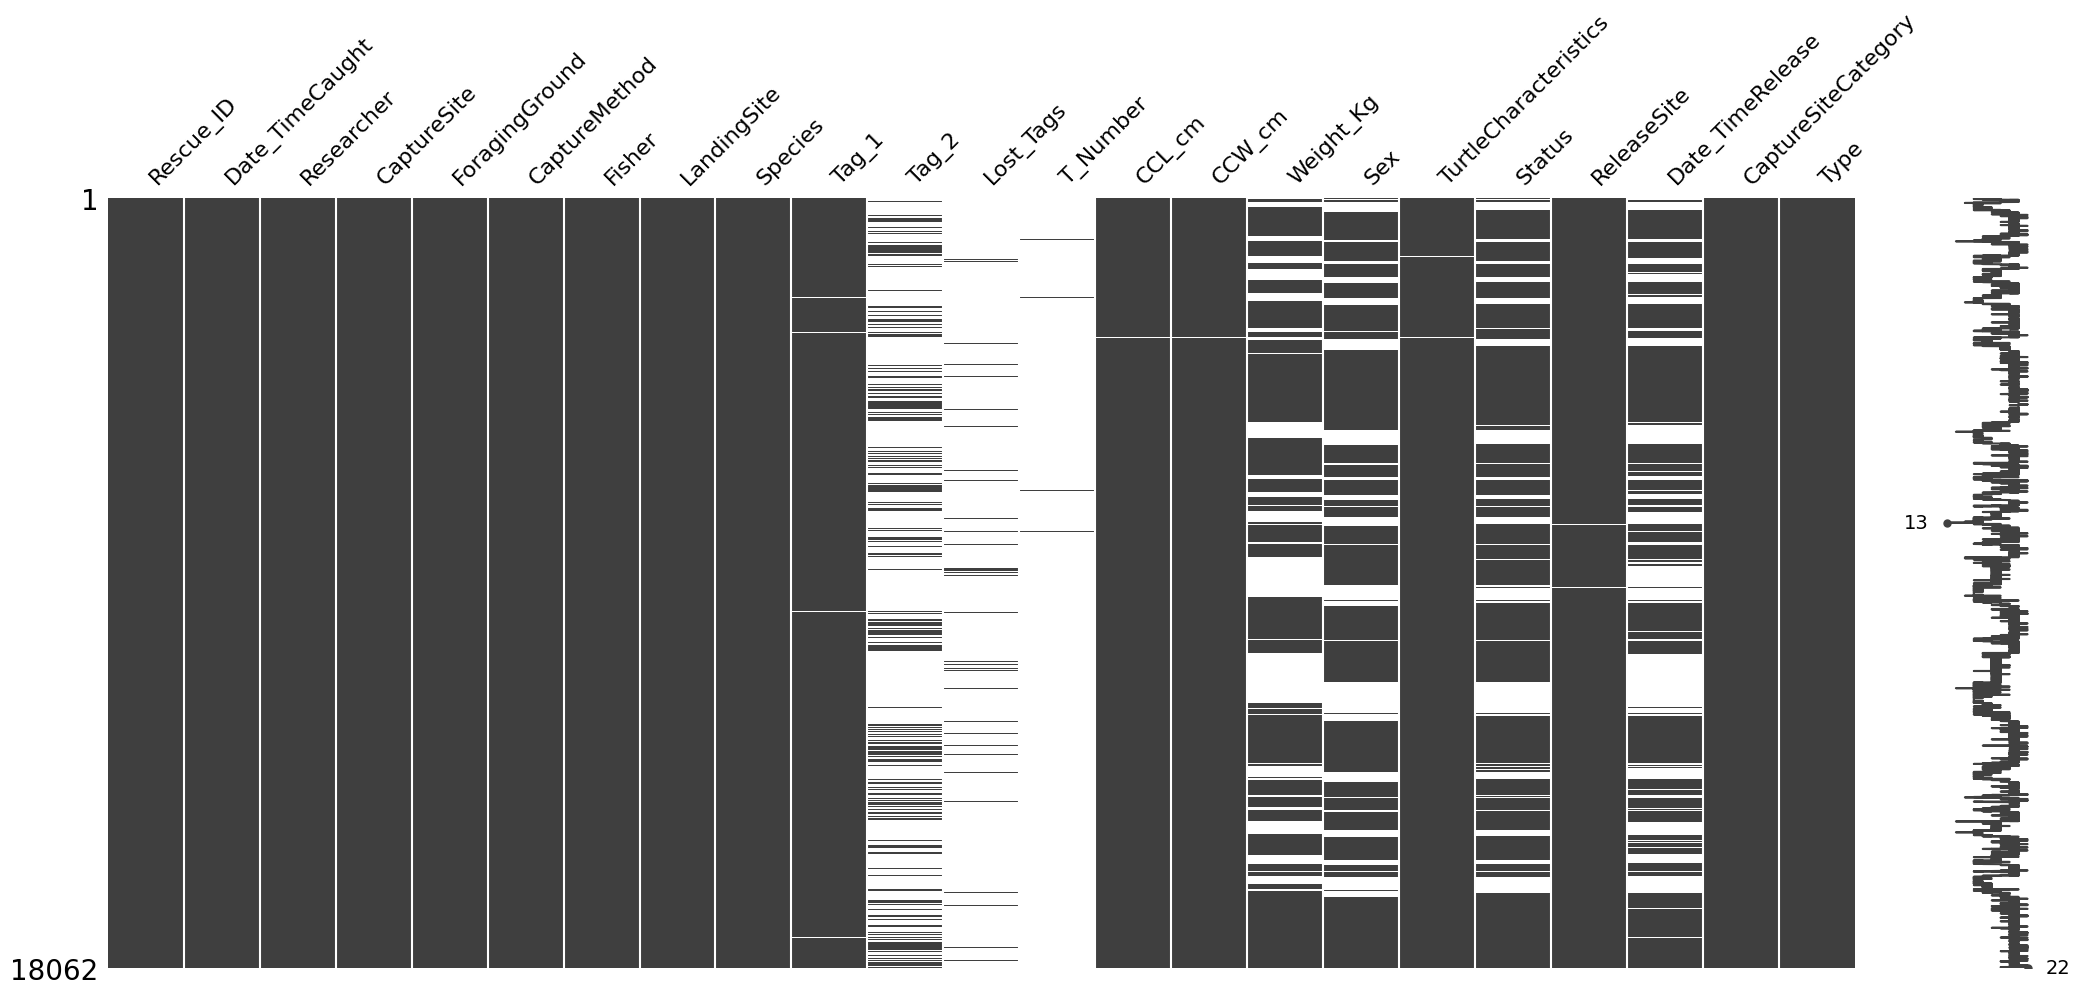

In [347]:
msno.matrix(df_train)

## Dropping columns with too many missing values: t_number, tag2, lost_tags

In [348]:
# Drop columns 'CaptureSite' and 'CaptureSite_category'
df_train = df_train.drop(['T_Number', 'Lost_Tags', 'Tag_2'], axis=1)
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1


## Transform date to datetime format

In [349]:
# Transform 'Date_TimeCaught' column to datetime format
df_train['Date_TimeCaught'] = pd.to_datetime(df_train['Date_TimeCaught'])

#create new columns for year and week of year, year_woy (year and week of year combined)
df_train["year"]=df_train.Date_TimeCaught.dt.year
df_train["week_of_year"]=df_train.Date_TimeCaught.dt.isocalendar().week
df_train["year_woy"]=df_train.year*100+df_train.week_of_year

df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


In [350]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rescue_ID              18062 non-null  object        
 1   Date_TimeCaught        18062 non-null  datetime64[ns]
 2   Researcher             18062 non-null  object        
 3   CaptureSite            18062 non-null  object        
 4   ForagingGround         18062 non-null  object        
 5   CaptureMethod          18062 non-null  object        
 6   Fisher                 18062 non-null  object        
 7   LandingSite            18062 non-null  object        
 8   Species                18062 non-null  object        
 9   Tag_1                  17937 non-null  object        
 10  CCL_cm                 18038 non-null  float64       
 11  CCW_cm                 18035 non-null  float64       
 12  Weight_Kg              12653 non-null  float64       
 13  S

## separate srtings_numbers ??

## Group by week and capturesite

In [351]:
# groupby year/ capture site  
df_train.groupby(['year_woy', 'CaptureSite'])
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


## Define the target

In [352]:
# Grouping and counting
Target=df_train.groupby(["year_woy","CaptureSite"]).CaptureSite.count().rename("Number_Turtles").reset_index()

df_train.head()


,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,Unknown,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232


In [353]:
Target.head()

,year_woy,CaptureSite,Number_Turtles
0,199816,CaptureSite_27,1
1,199828,CaptureSite_11,1
2,199832,CaptureSite_11,1
3,199832,CaptureSite_27,1
4,199839,CaptureSite_11,2


In [354]:
# Merge table df_train and df_capturesite_categoryn on 'CaptureSite'

df_train_final = pd.merge(df_train, Target, on=['year_woy', 'CaptureSite'], how='left')
df_train_final.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,CaptureSiteCategory,Type,year,week_of_year,year_woy,Number_Turtles
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,algae at rear of shell,Released,ReleaseSite_50,22/12/00,CaptureSiteCategory_2,Type_1,2000,51,200051,1
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01,CaptureSiteCategory_2,Type_1,2001,43,200143,1
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,clean,Released,ReleaseSite_50,01/11/01,CaptureSiteCategory_2,Type_1,2001,44,200144,1
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02,CaptureSiteCategory_2,Type_1,2002,11,200211,1
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02,CaptureSiteCategory_2,Type_1,2002,32,200232,2


In [355]:
df_train_final.columns

Index(['Rescue_ID', 'Date_TimeCaught', 'Researcher', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'Fisher', 'LandingSite', 'Species',
       'Tag_1', 'CCL_cm', 'CCW_cm', 'Weight_Kg', 'Sex',
       'TurtleCharacteristics', 'Status', 'ReleaseSite', 'Date_TimeRelease',
       'CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy',
       'Number_Turtles'],
      dtype='object')

In [356]:
df_train_final.shape

(18062, 24)

<Axes: >

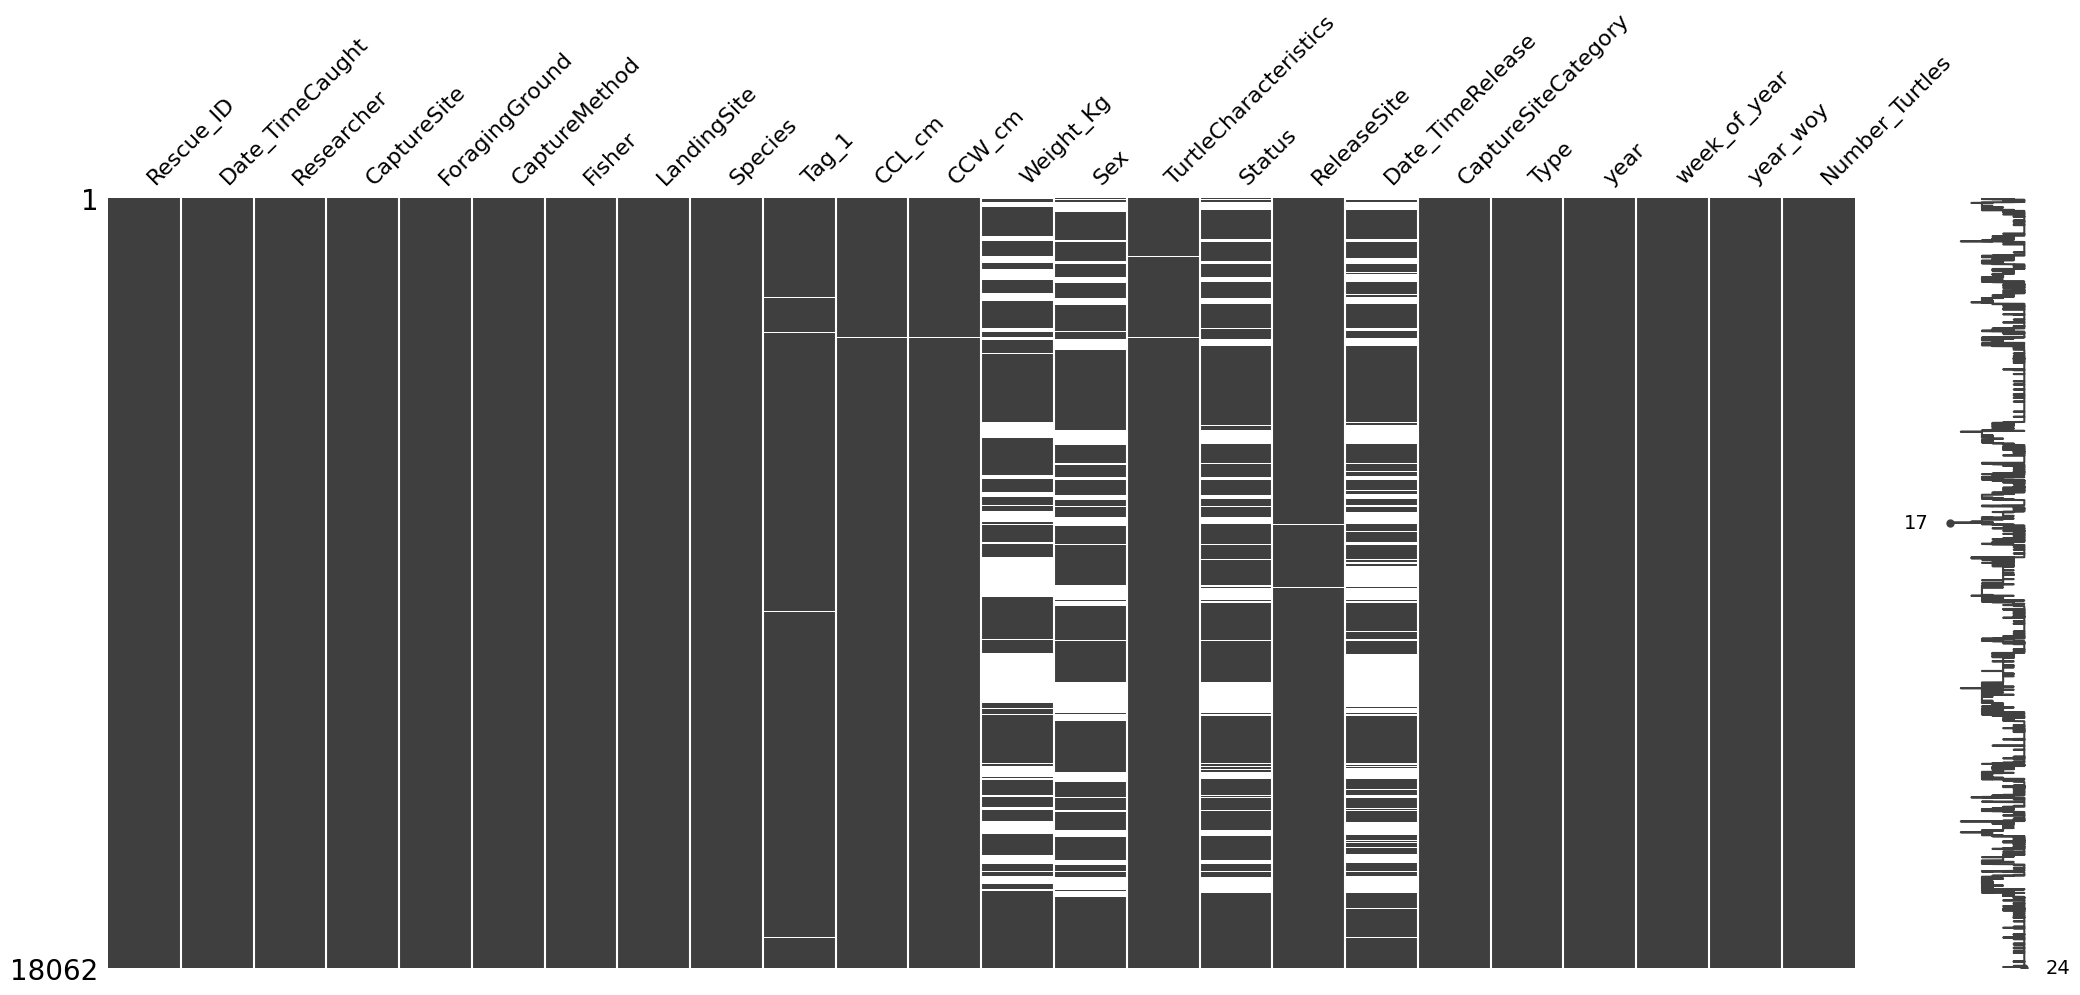

In [357]:
msno.matrix(df_train_final)

## Split train-test

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.dummy import DummyClassifier

from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [359]:
# Getting non-numerical features
features_not_numerical = [ 'Date_TimeCaught', 'CaptureSite',
       'ForagingGround', 'CaptureMethod', 'LandingSite', 'Species', 'Sex',
       'Status', 'CaptureSiteCategory', 'Type', 'year', 'week_of_year', 'year_woy']

If you want to drop other columns, dont forget to change features_not_numerical

In [360]:
# Dropping features: 'Rescue_ID', 'Researcher', 'Fisher','Tag_1','TurtleCharacteristics', 'ReleaseSite', 'Date_TimeRelease' 
df_train_final = df_train_final.drop(['Rescue_ID', 'Researcher', 'Fisher','Tag_1','TurtleCharacteristics', 'ReleaseSite', 'Date_TimeRelease'], axis=1)


In [361]:
# Define features and target
X = df_train_final.drop(['Number_Turtles'], axis=1)

y = df_train_final['Number_Turtles']

In [362]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Fill missing values - X_train and X_test

Not sure if we have to fill na in X_train and X_test or only in X_train

In [363]:
# Fill missing values of Sex with Unknown
X_train.Sex.value_counts()

Sex
Unknown         10826
Female             85
Male               33
Not_Recorded        2
Name: count, dtype: int64

In [364]:
X_train.Sex.fillna('Unknown', inplace=True)
X_test.Sex.fillna('Unknown', inplace=True)


X_train.Sex.value_counts()

Sex
Unknown         14329
Female             85
Male               33
Not_Recorded        2
Name: count, dtype: int64

In [365]:
# Fill missing values of Status with Not_Recorded
X_train['Status'].value_counts()

Status
Released                                    10858
Admitted                                      226
Not_Recorded                                   20
 green algae on carapace                        7
 no other major characteristics                 6
                                            ...  
 notch btw 9/10RMS & on 11RMS & 9LMS            1
 green algae on rear carapace                   1
 light flaking on shell& sm b on L supra        1
 small Bs on shoulder and 3rd CS                1
 tip of supras damaged                          1
Name: count, Length: 361, dtype: int64

In [366]:
X_train.Status.fillna('Not_Recorded', inplace=True)
X_test.Status.fillna('Not_Recorded', inplace=True)

In [367]:
# Fill missing values of ReleaseSite with Unknown
#X_train.ReleaseSite.fillna('Unknown', inplace=True)
#X_test.ReleaseSite.fillna('Unknown', inplace=True)

In [368]:
# Fill missing values of TurtleCharacteristics with Unknown
#X_train.TurtleCharacteristics.fillna('Unknown', inplace=True)
#X_test.TurtleCharacteristics.fillna('Unknown', inplace=True)

In [369]:
# Tag_1 - Fill missing values with NotTagged
#X_train.Tag_1.value_counts()

In [370]:
# how to fill in missing values for Tag_1? answer: use the most frequent value? or use the most frequent value per year?
#X_train.Tag_1.fillna('NotTagged', inplace=True)
#X_test.Tag_1.fillna('NotTagged', inplace=True)

? from 2_Random_Forest_Tutorial: We'll fill in the missing values with the mean of the column. It's important to note that we fill in missing values in the test set with the mean of columns in the training data. This is necessary because if we get new data, we'll have to use the training data to fill in any missing values. 

In [371]:
# Fill missing values of Weight_Kg with median 
# We have an outlier, so lets use the median to fill the missing values
X_train.Weight_Kg.describe()

count    10131.000000
mean         9.833175
std          9.770500
min          0.020000
25%          5.000000
50%          7.460000
75%         10.740000
max        140.000000
Name: Weight_Kg, dtype: float64

In [372]:
X_train.Weight_Kg.fillna(X_train.Weight_Kg.median(), inplace=True)
X_test.Weight_Kg.fillna(X_train.Weight_Kg.median(), inplace=True)

In [373]:
# how to fill in for CCL_cm and CCW_cm? check median by species?
X_train.groupby('Species').CCL_cm.median()

Species
Species_0    45.00
Species_1    60.55
Species_2    44.80
Species_3    38.50
Species_4    84.30
Species_5    43.90
Species_6    35.70
Species_7    54.70
Name: CCL_cm, dtype: float64

In [374]:
#then fill in missing values with median per species
X_train.CCW_cm.fillna(X_train.groupby('Species').CCW_cm.transform('median'), inplace=True)
X_test.CCW_cm.fillna(X_train.groupby('Species').CCW_cm.transform('median'), inplace=True)


X_train.CCL_cm.fillna(X_train.groupby('Species').CCL_cm.transform('median'), inplace=True)
X_test.CCL_cm.fillna(X_train.groupby('Species').CCL_cm.transform('median'), inplace=True)


<Axes: >

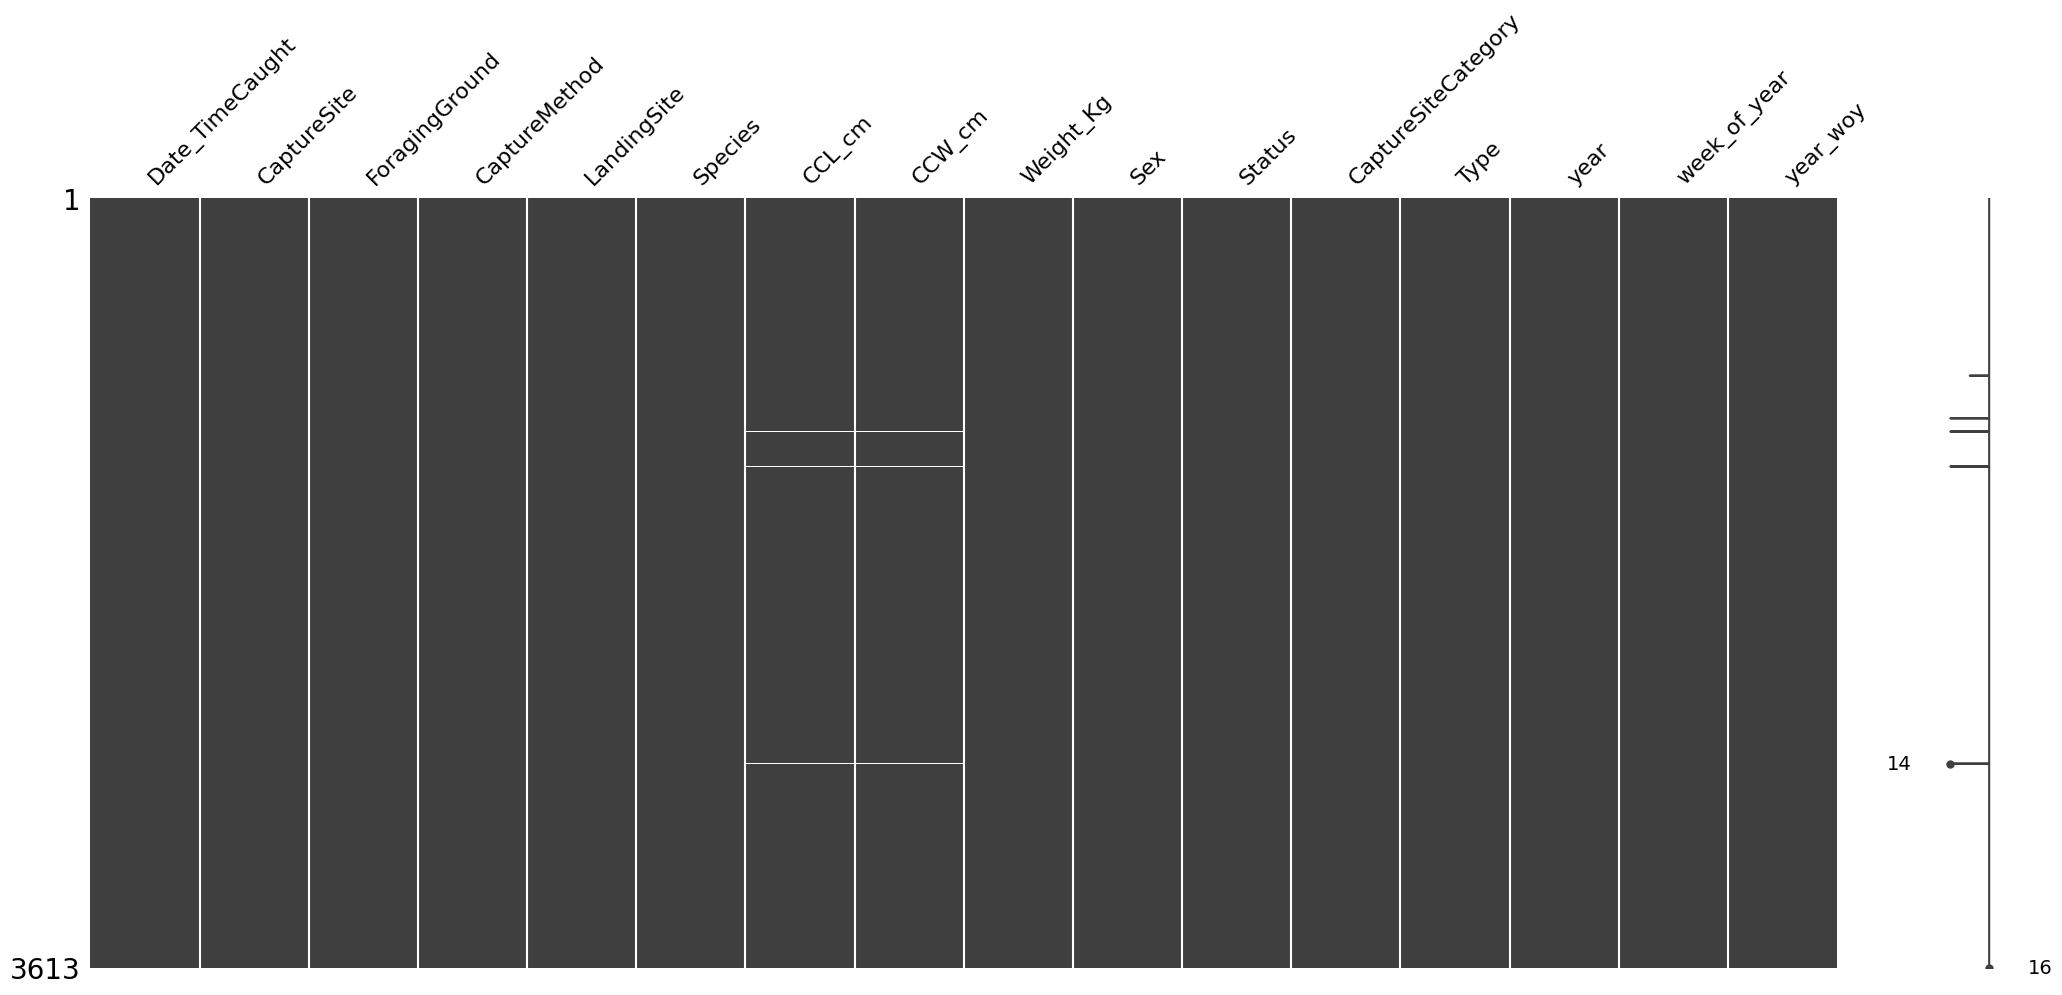

In [375]:
msno.matrix(X_test)

<Axes: >

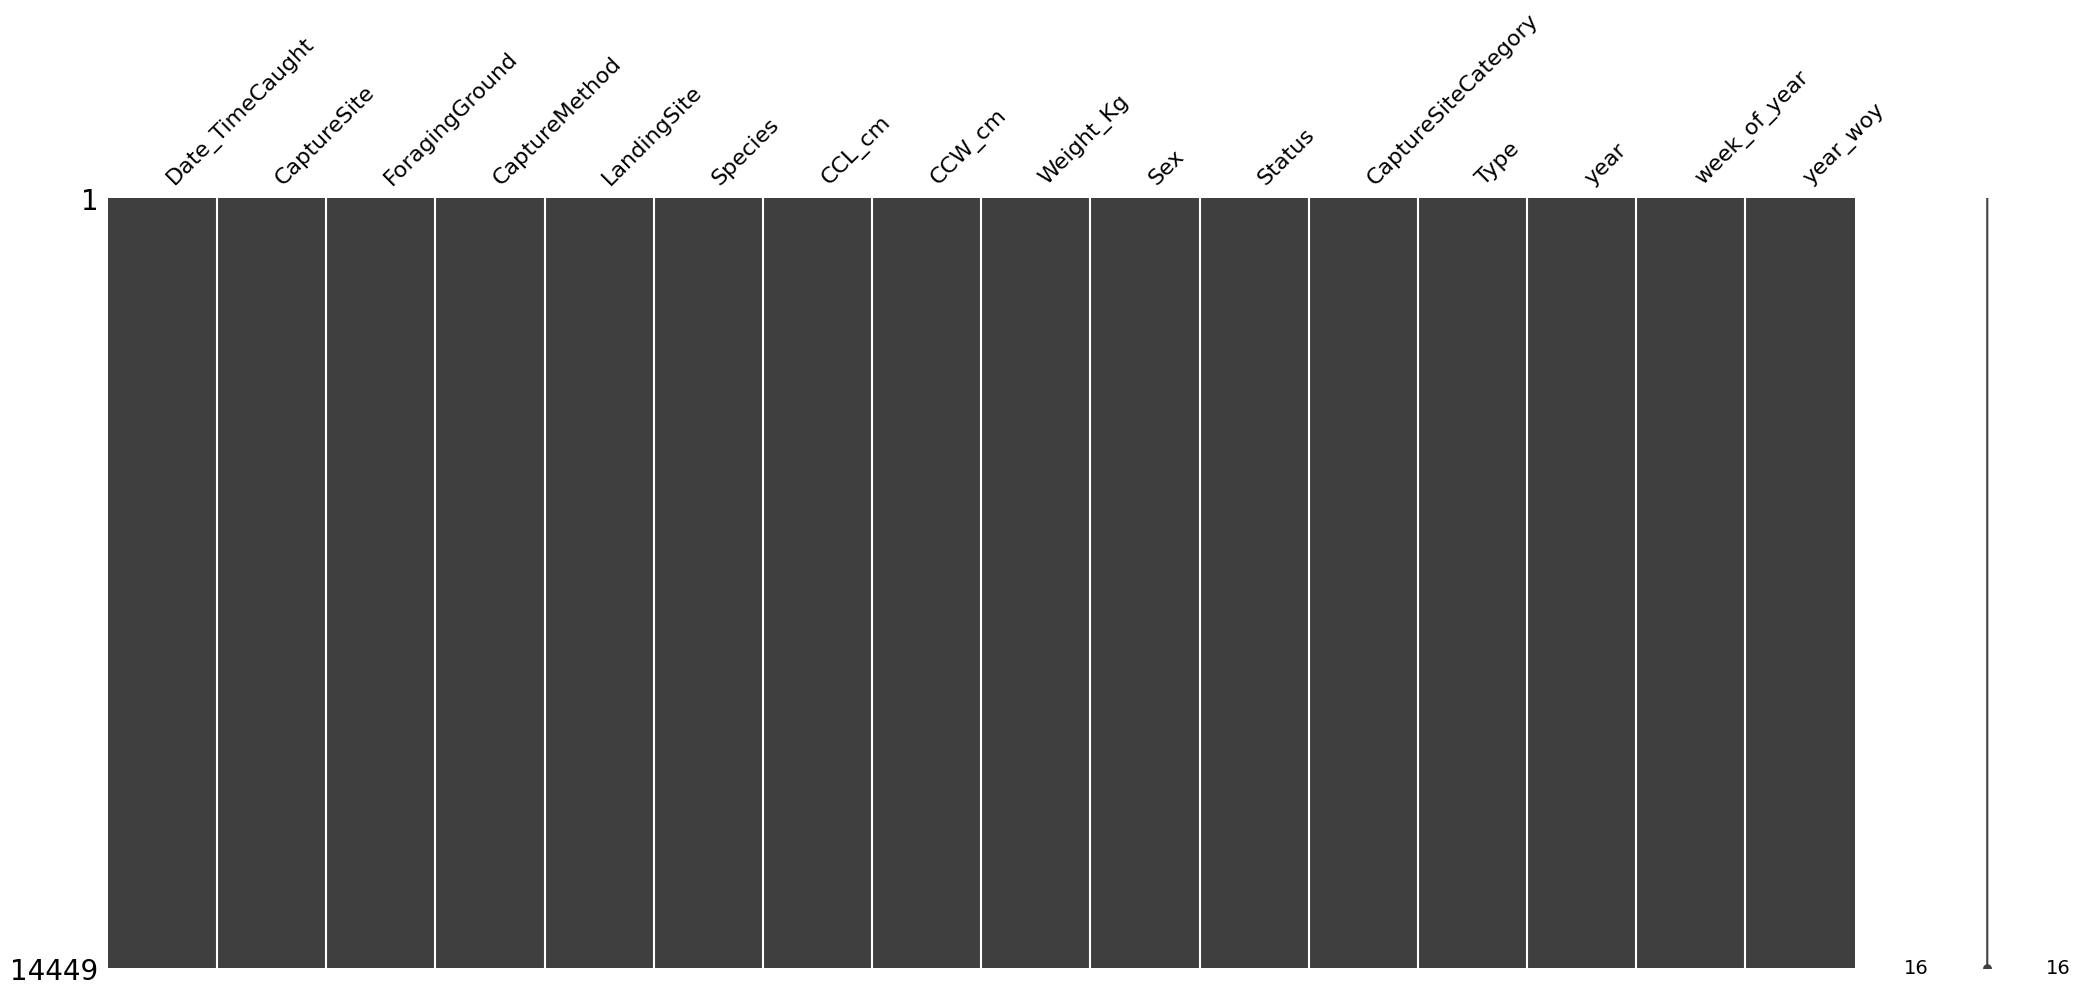

In [376]:
msno.matrix(X_train)

## ColumnTransformer 

In [377]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [378]:
# Creating a feature transformer to transform the non-numerical features and the numerical features separately 
feature_transformer = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), features_not_numerical),
    ('Standard_Scaler', StandardScaler(), ['CCL_cm', 'CCW_cm', 'Weight_Kg']), 
])

X_train_trans = feature_transformer.fit_transform(X_train)
X_test_trans = feature_transformer.transform(X_test)

In [379]:
X_train_trans.shape


(14449, 6370)

---

## Training the Baseline model: DummyRegressor

In [380]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X_train_trans, y_train)
y_pred_dr = dummy_mean.predict(X_test_trans)

print('Dummy Regressor root mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred_dr, squared=False)))

Dummy Regressor root mean squared error: 3.82


In [381]:
mae_dr = mean_absolute_error(y_test, y_pred_dr)
mse_dr = mean_squared_error(y_test, y_pred_dr)
rmse_dr = np.sqrt(mse_dr)
r2_dr = r2_score(y_test, y_pred_dr)

print("Baseline: Dummy Regressor ")
print("Mean Absolute Error (MAE):", round(mae_dr, 2))
print("Mean Squared Error (MSE):", round(mse_dr, 2))
print("Root Mean Squared Error (RMSE):", round(rmse_dr, 2))
print("R-squared (R2) Score:", round(r2_dr, 2))

Baseline: Dummy Regressor 
Mean Absolute Error (MAE): 2.82
Mean Squared Error (MSE): 14.57
Root Mean Squared Error (RMSE): 3.82
R-squared (R2) Score: -0.0


After dropping columns: 'Rescue_ID', 'Researcher', 'Fisher','Tag_1','TurtleCharacteristics', 'ReleaseSite', 'Date_TimeRelease' -> same RMSE: 3.82

## Creating and training a random forest

In [382]:
from sklearn.ensemble import RandomForestRegressor

# Set random seed to ensure reproducible runs
RSEED = 50

# Create the model with 100 trees
randomforestregressor = RandomForestRegressor(n_estimators=100, # n_estimators is the number of trees in the forest
                               random_state=RSEED, 
                               max_features = 'sqrt', # max_features is the size of the random subsets of features to consider when splitting a node
                               n_jobs=-1, verbose = 1) # -1 means using all processors in your computer

# Fit on training data
randomforestregressor.fit(X_train_trans, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.4s finished


RandomForestRegressor(max_features='sqrt', n_jobs=-1, random_state=50,
                      verbose=1)

In [383]:
# Print average number of nodes and maximum depth
n_nodes = []
max_depths = []

for ind_tree in randomforestregressor.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')


Average number of nodes 14010
Average maximum depth 215


## Random forest results

Notebook: 2_Random_Forest_Tutorial (17_Random forest), is a classification problem. Different metrics. I still have missing values in X_test_trans -> SimpleImputer

In [384]:
X_test_trans

array([[ 0.        ,  0.        ,  0.        , ..., -1.27701044,
        -1.33011808, -0.74205252],
       [ 0.        ,  0.        ,  0.        , ..., -0.36919407,
        -0.57649715, -0.20404931],
       [ 0.        ,  0.        ,  0.        , ..., -0.4872102 ,
         0.00630304, -0.196779  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.27841243,
        -0.25495222, -0.1713329 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.27841243,
        -0.11427631, -0.18829696],
       [ 0.        ,  0.        ,  0.        , ..., -0.25117794,
        -0.08413148, -0.13619305]])

In [385]:
X_train_trans

array([[ 0.        ,  0.        ,  0.        , ..., -0.65969531,
        -0.77746273, -0.42700559],
       [ 0.        ,  0.        ,  0.        , ...,  0.71110741,
         0.60919978,  0.65142426],
       [ 0.        ,  0.        ,  0.        , ...,  0.85635803,
         0.72977913, -0.20162587],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.54167918,
        -0.40567641, -0.20162587],
       [ 0.        ,  0.        ,  0.        , ..., -0.67785164,
        -0.70712478, -0.43791106],
       [ 0.        ,  0.        ,  0.        , ..., -0.86849308,
        -0.71717306, -0.62088062]])

In [386]:
# Check for NaN values
nan_indices = np.isnan(X_test_trans).any(axis=1)
nan_rows = X_test_trans[nan_indices]
print("Number of rows with NaN values:", len(nan_rows))

Number of rows with NaN values: 5


In [387]:
# Imput missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Use the same strategy as in training
imputer.fit(X_train_trans)  # Fit on training data
X_test_trans = imputer.transform(X_test_trans)  # Transform testing data


In [388]:
# Maki_ng predictions
y_pred_rf = randomforestregressor.predict(X_test_trans)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


## Model evaluation

In [389]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [390]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Model 1: Random Forest")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2, 2))

print('---------------------------------')

print("Baseline: Dummy Regressor ")
print("Mean Absolute Error (MAE):", round(mae_dr, 2))
print("Mean Squared Error (MSE):", round(mse_dr, 2))
print("Root Mean Squared Error (RMSE):", round(rmse_dr, 2))
print("R-squared (R2) Score:", round(r2_dr, 2))

Model 1: Random Forest
Mean Absolute Error (MAE): 1.13
Mean Squared Error (MSE): 2.25
Root Mean Squared Error (RMSE): 1.5
R-squared (R2) Score: 0.85
---------------------------------
Baseline: Dummy Regressor 
Mean Absolute Error (MAE): 2.82
Mean Squared Error (MSE): 14.57
Root Mean Squared Error (RMSE): 3.82
R-squared (R2) Score: -0.0


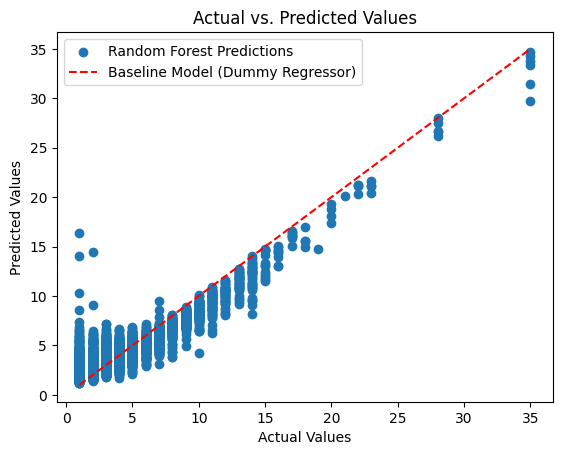

In [391]:
# Calculate the range of values for the baseline model
y_min = min(min(y_test), min(y_pred_dr))
y_max = max(max(y_test), max(y_pred_dr))

# Create a sequence of values for the baseline model line
baseline_line = np.linspace(y_min, y_max, 100)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred_rf, label='Random Forest Predictions')
plt.plot(baseline_line, baseline_line, color='red', linestyle='--', label='Baseline Model (Dummy Regressor)')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


## Feature importance

## Hyperparameters tunning

## New model evaluation and comparison